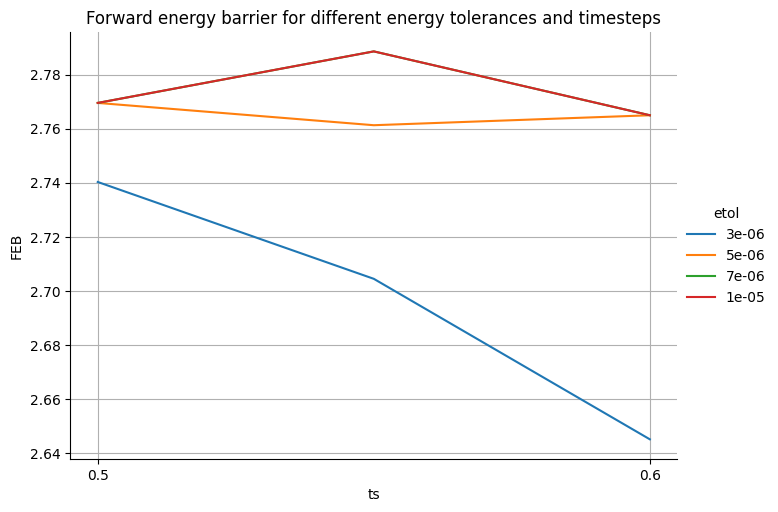

In [23]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas
import seaborn as sns
import numpy as np

#seaborn.set(style='ticks')


base="/home/agoga/documents/code/topcon-md/output/NEB/smallersample/"
fileList=["125-133.csv","125-124.csv","125-134.csv","125-339.csv","125-126.csv","125-344.csv"]

base="/home/agoga/documents/code/topcon-md/output/NEB/sixloc/"
fileList=["3924-1547.csv","3924-3632.csv","3924-1545.csv","3924-3599.csv","3924-1548.csv","3924-3955.csv"]

base="/home/agoga/documents/code/topcon-md/output/NEB/preciseconvergence"
fileList=["3924-1547.csv"]

base="/home/agoga/documents/code/topcon-md/output/NEB/noHConvergence/"
base="/home/agoga/documents/code/topcon-md/output/NEB/HConvergence/"
fileList=["pairs.csv"]

#mirror pairs
#133 126
#344 134
#339 124

for f in fileList:
    d=base+f
    data = pandas.read_csv(d)
    #data = pandas.read_csv("/home/agoga/documents/code/topcon-md/output/NEB/fixed/4090.csv")
    #data = pandas.read_csv("/home/agoga/documents/code/topcon-md/output/NEB/varyTSmin/125.csv")



    data=data[data.etol<3e-5]
    data=data[data.etol>1e-06]
    data=data[data.ts>=0.5]
    data=data[data.ts<=0.6]
    data = data[data.FEB < 4]

    # data=data[data.etol <3e-5]
    # data=data[data.etol >3e-6]

    #sns.relplot(data=data,x="ts",y="A",hue="etol", kind="line",aspect=1.4,palette='tab10')#sns.color_palette("Set2"))
    sns.relplot(data=data,x="ts",y="FEB",hue="etol", kind="line",aspect=1.4,palette='tab10')#sns.color_palette("Set2"))

    #plt.hlines(y=3.2,color='r',xmin=0.3,xmax=2,linestyles='-.')
    # plt.ylim(top=3.6)
    plt.grid()
    plt.xticks(np.arange(0.5,0.7,0.1))
    plt.title('Forward energy barrier for different energy tolerances and timesteps')


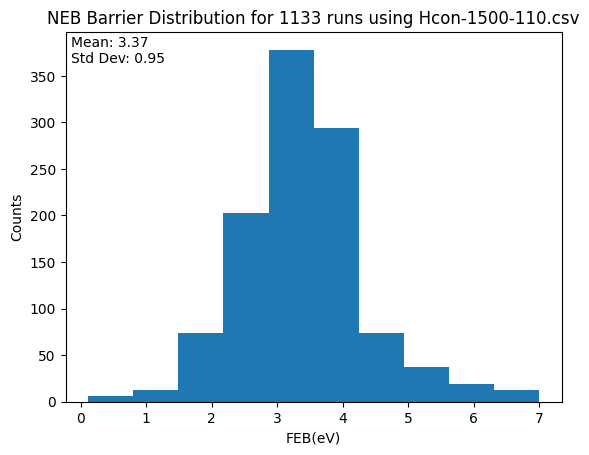

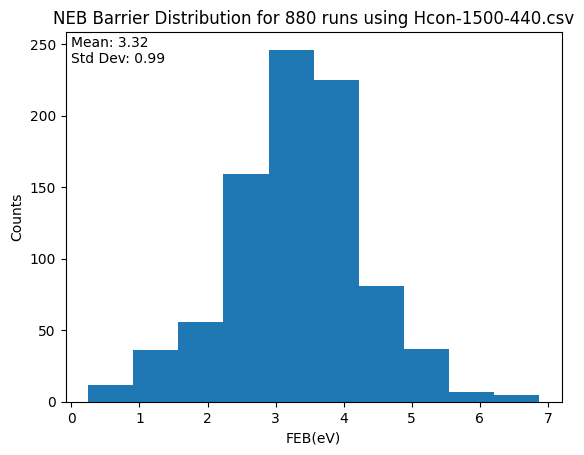

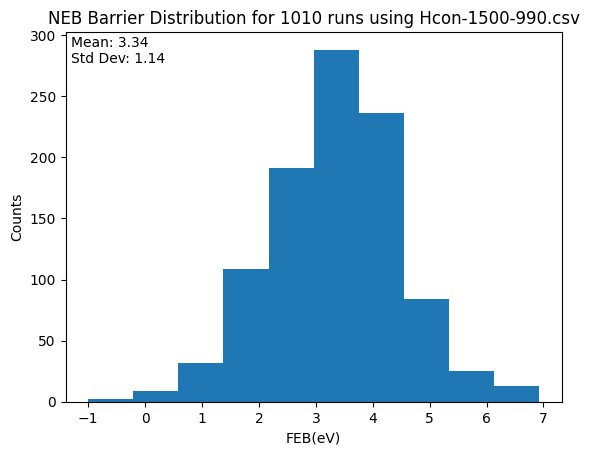

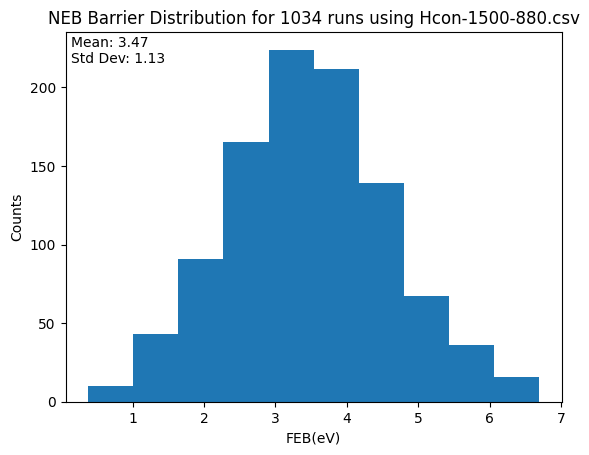

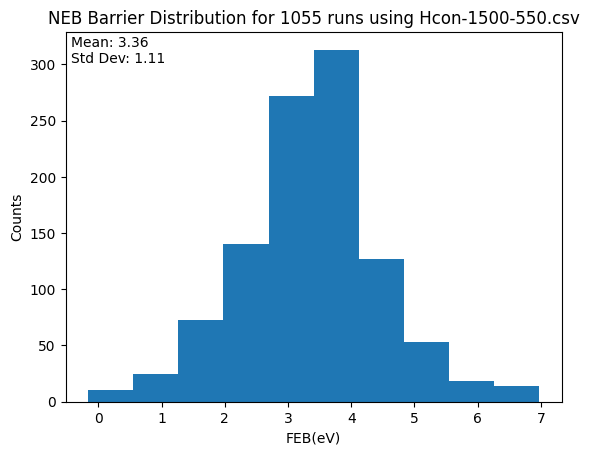

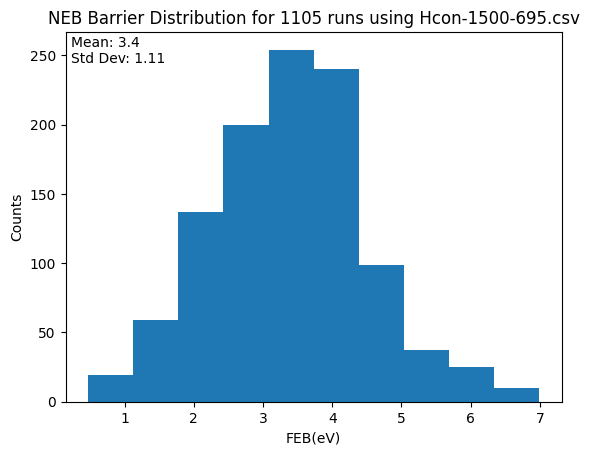

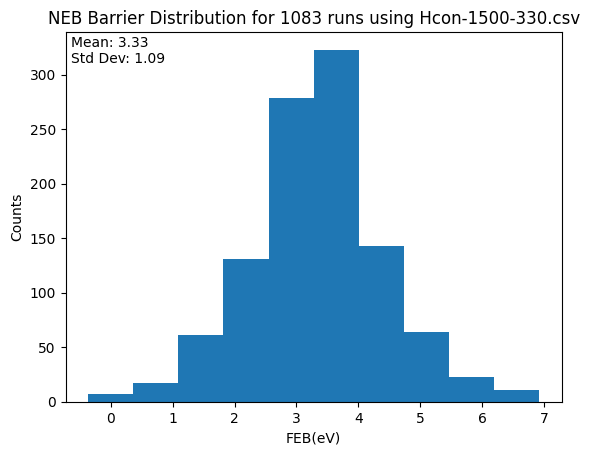

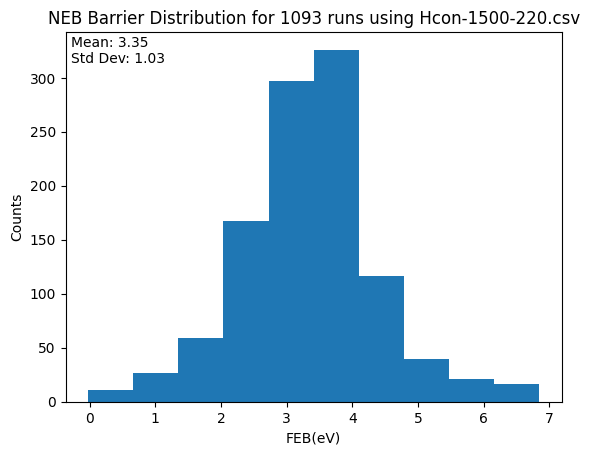

In [15]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas
import numpy as np
import statistics
from pathlib import Path


nebfolder="/home/agoga/documents/code/topcon-md/output/NEB/"


group="bulk/"
dstats=[]


for d in Path(nebfolder+group).rglob('*.csv'):

    csvfile=d
    #print(d)
    data = pandas.read_csv(csvfile)

    

    dist=[]
    
    done=[]
    bad=[]#["78-90","78-89","168-178","171-899","258-270","258-363","265-270"]

    #H 3%
    #hclose=[363, 697, 1101, 1342, 1906, 2561, 3166, 3347, 3560, 3791]
    #H 6%
    #hclose=[106, 210, 232, 348, 597, 689, 880, 1879, 2214, 3155, 3218, 3345, 3867, 4738, 5505, 5549, 5950, 6111] 
    hclose=[]
    total=0
    skip=0
    for index,row in data.iterrows():

        sum=0
        over=0
        pair = row['pair']
        hkill=False
        for hc in hclose:
            if str(hc) in pair:
                hkill=True
        if hkill==True:
            continue
        
        if pair not in done and pair not in bad:
            for i,r in data[data.pair==pair].iterrows():
                if r['dist'] < 3.8:
                    feb = r['FEB']
                    if feb>7 and feb<8:
                        #print(f"debug - {pair}")
                        p=1
                    if feb < 7: # and feb > 0.5:
                        sum += feb
                        over+=1

            if over >0:
                avg = sum/over
                dist.append(avg)
            done.append(pair)
            total+=1
        else:
            skip+=1

    mean=statistics.mean(dist)
    stddev=statistics.stdev(dist)
    dstats.append([mean,stddev/2])
    
    mstxt=f"Mean: {round(mean,2)}\nStd Dev: {round(stddev,2)}"

    f,ax = plt.subplots()
    plt.title(f'NEB Barrier Distribution for {total} runs using {str(csvfile).split("/")[-1]}')
    plt.xlabel('FEB(eV)')
    plt.ylabel('Counts')
    plt.hist(dist,10)

    plt.text(0.01,0.99,mstxt,ha='left',va='top', transform=ax.transAxes, fontsize = 10)
    plt.show()

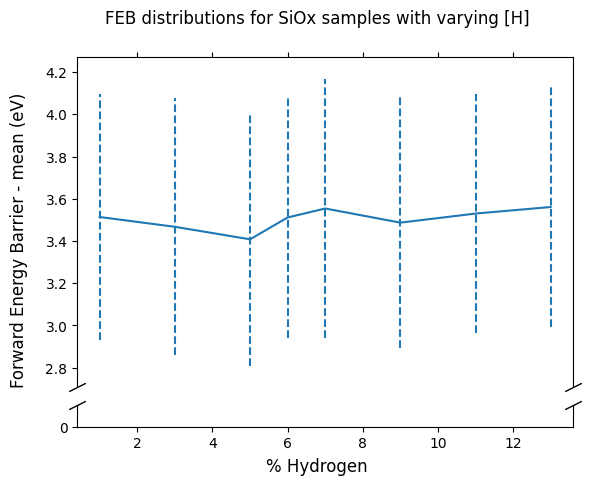

In [4]:
import numpy as np
import matplotlib.pyplot as plt
#1%, 3%, 5%, 6%, 7%, 9%, 11%, 13%
xvals=[1,3,5,6,7,9,11,13]
yer=np.array(dstats).T.tolist()
min=10
max=0

for y in dstats:
    plus=y[0]+y[1]
    minus=y[0]-y[1]

    if  plus > max:
        max =plus
    if minus < min:
        min=minus
        
        
fig, (ax1,ax2)=plt.subplots(2,1,sharex=True,height_ratios=[15,1])

fig.subplots_adjust(hspace=0.1)

fig.suptitle('FEB distributions for SiOx samples with varying [H]')

fig.supxlabel('% Hydrogen')
fig.supylabel('Forward Energy Barrier - mean (eV)')
ax2.set_yticks((0,10))
ax2.set_ylim(0,0.5)
ax1.set_ylim(min-.1,max+.1)
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()

ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()


d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

erb=ax1.errorbar(xvals,yer[0],yerr=yer[1])
erb[-1][0].set_linestyle('--')